# COURSE: PCA and multivariate neural signal processing
## SECTION: Source separation with GED
### VIDEO: Python: Quadratic form surfaces and GED
#### Instructor: sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# NOTE: numpy does not solve the GED, so we use scipy
import scipy.linalg

In [6]:
## quadratic forms of S, R, and S/R

# create two little matrices
S = np.array([ [1,2],  [2,9]  ])
R = np.array([ [2,-1], [-1,4] ])


# weights along each dimension
wi = np.arange(-2,2,.01)

# initialize
quadformS = np.zeros( (len(wi),len(wi)) )
quadformR = np.zeros( (len(wi),len(wi)) )
quadformG = np.full( (len(wi),len(wi)),np.nan )

# fudge-factor for preventing the surface from running off
fudge = .1

for i in range(len(wi)):
    for j in range(len(wi)):
        
        # define the weights for this iteration
        w  = np.array([ wi[i], wi[j] ]).T
        nf = w.T@w
        
        # quadratic form of matrix S
        quadformS[i,j] = w.T @ S @ w / nf
        
        # QF of matrix R
        quadformR[i,j] = w.T @ R @ w / nf
        
        # QF of ratio
        quadformG[i,j] = (w.T@S@w+fudge) / (w.T@R@w+fudge)
        


# eigenvectors of S and R
evals,evecsS = np.linalg.eig(S)
evals,evecsR = np.linalg.eig(R)

# eigenvectors from GED
evals,evecsGED = scipy.linalg.eigh(S,R)


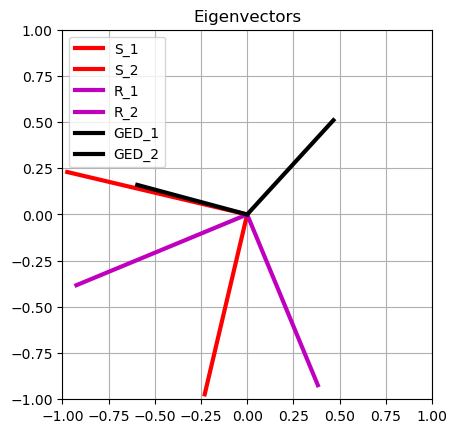

In [7]:
## visualize the eigenvectors

# eigenvectors of S
plt.plot([0,evecsS[0,0]],[0,evecsS[1,0]],'r',linewidth=3,label='S_1')
plt.plot([0,evecsS[0,1]],[0,evecsS[1,1]],'r',linewidth=3,label='S_2')

# eigenvectors of R
plt.plot([0,evecsR[0,0]],[0,evecsR[1,0]],'m',linewidth=3,label='R_1')
plt.plot([0,evecsR[0,1]],[0,evecsR[1,1]],'m',linewidth=3,label='R_2')

# eigenvectors of GED
plt.plot([0,evecsGED[0,0]],[0,evecsGED[1,0]],'k',linewidth=3,label='GED_1')
plt.plot([0,evecsGED[0,1]],[0,evecsGED[1,1]],'k',linewidth=3,label='GED_2')

plt.axis('square')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.grid()
plt.legend()
plt.title('Eigenvectors')
plt.show()

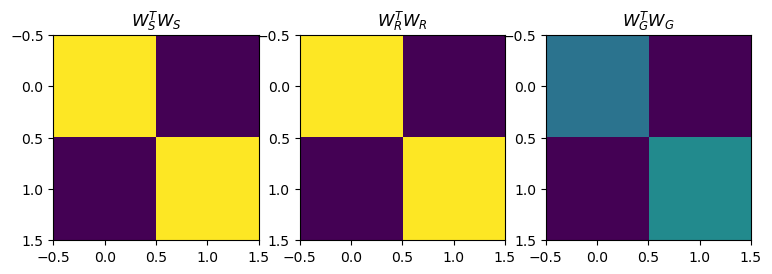

In [8]:
# Show that V'V=I only for the eigenvectors of S and R (not for GED)

_,axs = plt.subplots(1,3,figsize=(9,4))

axs[0].imshow( evecsS.T@evecsS ,vmin=0,vmax=1)
axs[0].set_title('$W_S^TW_S$')

axs[1].imshow( evecsR.T@evecsR ,vmin=0,vmax=1)
axs[1].set_title('$W_R^TW_R$')

axs[2].imshow( evecsGED.T@evecsGED ,vmin=0,vmax=1)
axs[2].set_title('$W_G^TW_G$')

plt.show()

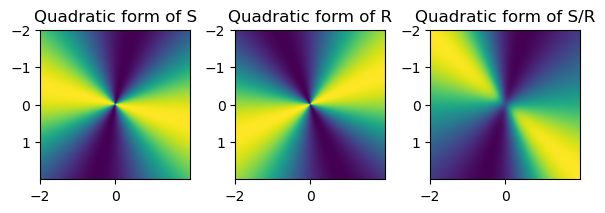

In [9]:
# show the quadratic form surfaces
_,axs = plt.subplots(1,3,figsize=(6,3))

axs[0].imshow(quadformS,extent=[wi[0],wi[-1],wi[-1],wi[0]])
axs[0].set_title('Quadratic form of S')

axs[1].imshow(quadformR,extent=[wi[0],wi[-1],wi[-1],wi[0]])
axs[1].set_title('Quadratic form of R')

axs[2].imshow(quadformG,extent=[wi[0],wi[-1],wi[-1],wi[0]])
axs[2].set_title('Quadratic form of S/R')

plt.tight_layout()
plt.show()